# Stock Trading Analysis

#### Using Twitter Data to Observe Trends in Financial Markets

#### Project Methodology | Notebook One

There are several popular investors that gain notoriety by sharing a few of their stock picks on Twitter. The goal of this project is to extract popular Tweets to identify ticker symbols for further analysis. The stock data in this project will come from Yahoo finance. The project will follow the OSEMN framework.  

#### Notebook Structure
* **Notebook 1 will focus on Twitter data and introductory ticker symbol analysis.** 
* Notebook 2 will dive deeper into the most frequently tweeted ticker symbols and their performance since January 1st of 2021. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster') 
pd.set_option('mode.chained_assignment', None)

In [2]:
import datetime
import twint
import nest_asyncio
nest_asyncio.apply()

# Obtain | Twitter Data

In [3]:
# configure search requirements
c = twint.Config()
c.Username = 'traderstewie'
c.Custom["tweet"] = ["date", "time", "username", "tweet", "photos", "link", "retweets_count", "likes_count"]
c.Since = '2021-01-01'
c.Store_csv = True
c.Output = 'twitterdata.csv'

# run
twint.run.Search(c)
# file automatically adds to the csv that was created

1412528760511860740 2021-07-06 14:47:54 -0700 <traderstewie> #ForzaAzzuri
1412483406953271300 2021-07-06 11:47:41 -0700 <traderstewie> $TAN and $ICLN showing good relative strength here as market goes into pullback mode  https://t.co/XaktnzkcU1
1412477323648016387 2021-07-06 11:23:31 -0700 <traderstewie> @itzFerniii #nailedit
1412476919367430148 2021-07-06 11:21:54 -0700 <traderstewie> Futbol fans rejoice!!   Huge game today!   #Italy vs #Spain in the Semi-Finals of the #EURO2020   Kick off in about 40 minutes!   Don't miss this one
1412430186394439685 2021-07-06 08:16:12 -0700 <traderstewie> Indices and overall market taking a hit today.   Most of the stocks that outperformed last week are mostly in the red today and the Small caps stocks that were red last week are mostly in the green today.   Typical Rotation games which has been emblematic of 2021 especially
1412217198903390212 2021-07-05 18:09:52 -0700 <traderstewie> @pnani456 The good news is that is was rescued
14122168810883932

1409528386435764226 2021-06-28 08:05:29 -0700 <traderstewie> @FcoPerez07 @YuanTalks Still holding
1409528322527166471 2021-06-28 08:05:14 -0700 <traderstewie> Nice moves in $TAN and $ICLN here  https://t.co/qtHUnzpT3V
1409521838804246528 2021-06-28 07:39:28 -0700 <traderstewie> @EllinRaul @tradersstewie Please block and report these fake stewie accounts.   ....   Twitter isn't doing anything
1409338687351967747 2021-06-27 19:31:41 -0700 <traderstewie> @Catwoman_1984 😆🤣😂
1409308477005041665 2021-06-27 17:31:39 -0700 <traderstewie> @ScotchyScotch12 Shukran!
1409307136107048962 2021-06-27 17:26:19 -0700 <traderstewie> @SyedRiz31211770 I'll look for them   Lebanese pine nuts are HUGE!
1409307051595943939 2021-06-27 17:25:59 -0700 <traderstewie> @MiyamotoM20 Can't wait!!
1409306930242195456 2021-06-27 17:25:30 -0700 <traderstewie> @rahulkapoorca Not deep fried.... baked in the oven
1409306461117636611 2021-06-27 17:23:38 -0700 <traderstewie> Making 'Fatayer' today!   Lebanese Spinach pies..

1408501910689091584 2021-06-25 12:06:38 -0700 <traderstewie> Made a detailed educational post on this setup:   "The Calm Before The Storm"    https://t.co/zoXLk0PIvU  Hope this helps!
1408500166772989956 2021-06-25 11:59:43 -0700 <traderstewie> $CLNE   like what I'm seeing here in the stock. Notice how it went into a two week "coma state". Volume completely dropped off as the stock price went into complete contraction mode.   Multiple mini ranged candles this week.   Look for a price jump soon  Target: $13 to $14  https://t.co/EWjkjMBJ02
1408485825776537601 2021-06-25 11:02:43 -0700 <traderstewie> @UnPhi1tered Disappeared.... puffff....  https://t.co/LlDbsgEV4W
1408475858428301317 2021-06-25 10:23:07 -0700 <traderstewie> @cbrower2141 😆🤣😂
1408475504861057028 2021-06-25 10:21:43 -0700 <traderstewie> When the stock you've been holding for several weeks suddenly goes into a Gamma Squeeze  https://t.co/tVkKm8cLSF
1408472868506116099 2021-06-25 10:11:14 -0700 <traderstewie> $WISH ... red to 

1408094212264914946 2021-06-24 09:06:35 -0700 <traderstewie> A good looking breakout here $APPS  https://t.co/Jv3SLwvI6r
1408091164591353856 2021-06-24 08:54:29 -0700 <traderstewie> @heavyequiptrade Some people seem unable to understand that simple notion....
1408089980233162755 2021-06-24 08:49:46 -0700 <traderstewie> @heavyequiptrade 😆🤣😂
1408086789005316096 2021-06-24 08:37:06 -0700 <traderstewie> $TSLA inches away from getting back into the $700s ......  https://t.co/SvTjK0ywhY
1408086503104729090 2021-06-24 08:35:57 -0700 <traderstewie> @aboda_negm 40
1408081023783428099 2021-06-24 08:14:11 -0700 <traderstewie> $BTU gaining good traction here  https://t.co/uqooxtAFT0
1408080734091317250 2021-06-24 08:13:02 -0700 <traderstewie> @KyleinKC Please block and report these fake stewie accounts
1408080626025041929 2021-06-24 08:12:36 -0700 <traderstewie> @Biotechs_trader Love the action here. Will update chart later today
1408080466285002755 2021-06-24 08:11:58 -0700 <traderstewie> @miguel

1407702009432530946 2021-06-23 07:08:07 -0700 <traderstewie> $NNDM... breaking out  https://t.co/TqA2T49CdW
1407700895169597448 2021-06-23 07:03:41 -0700 <traderstewie> Sure feels like this $SNAP wants to go here  https://t.co/z6YaEOtWG9
1407700659508375558 2021-06-23 07:02:45 -0700 <traderstewie> $SM bull flag breakout  https://t.co/PnkXV3zP8r
1407700320361189382 2021-06-23 07:01:24 -0700 <traderstewie> $BTU turning that corner  https://t.co/Aoxf8bMoDY
1407698449257009157 2021-06-23 06:53:58 -0700 <traderstewie> $TSLA making nice moves here  https://t.co/luxefgmtDH
1407576647847403520 2021-06-22 22:49:59 -0700 <traderstewie> @Catwoman_1984 Done and done!
1407575980466532355 2021-06-22 22:47:19 -0700 <traderstewie> My favorite part of the day....  Putting my 18 months old daughter to sleep on my shoulder.....  https://t.co/eAUp87stAS
1407536641518960641 2021-06-22 20:11:00 -0700 <traderstewie> @Aquatunnel @profit69668504 Aka.... "Peasant food" ... it's the best!   Try this cook book!  

1405947195640057857 2021-06-18 10:55:07 -0700 <traderstewie> $IWM came just shy of printing new highs. Sellers stepped in this week and knocked it down 5 days in a row.  Now sitting on the 50 day MA. Next week, see if bulls reclaim the tape following this week's "shake out".   2021 has been a very choppy year thus far  https://t.co/zga3FtsNHh
1405945627553370115 2021-06-18 10:48:53 -0700 <traderstewie> @chaisynyam One of my favorite setups here actually
1405945423794110465 2021-06-18 10:48:04 -0700 <traderstewie> @Maxs4152 Hi Tom  $PENN is at an important "do or die" spot here, on the charts.   It needs to hold $73 support... otherwise could head back into the $50s  Hope this helps bro  https://t.co/cxz07falOk
1405944677732261900 2021-06-18 10:45:07 -0700 <traderstewie> $HD ... new setup added to the AOT watchlist this week.   After a big, resilient run up in March and April, the stock has corrected smartly into a wedge pattern that's testing the 100 day MA here!   A good spot to consi

1404188166593007619 2021-06-13 14:25:22 -0700 <traderstewie> @HadjPadjOptions This market has been all about rotation...
1404187796827369474 2021-06-13 14:23:53 -0700 <traderstewie> @TeslaTodd420 🤣🤣
1404185967376814080 2021-06-13 14:16:37 -0700 <traderstewie> $STLD ... Steel stocks have been gaining a lot of momentum this year... Look for a new highs breakout in this one soon.   Targets; $70 to $75  https://t.co/fZRrukQ1xG
1404184036939948034 2021-06-13 14:08:57 -0700 <traderstewie> @BearishBullsCEO @TicTocTick 😅🤣
1404183716142862339 2021-06-13 14:07:41 -0700 <traderstewie> $TSLA ... tested and held support... now starting to gain a bit more traction. Look for an upside breakout soon.  https://t.co/JThbEdFMWw
1404181922499022849 2021-06-13 14:00:33 -0700 <traderstewie> $CROX ... made a very nice close on Friday.... sitting on a launching pad at this point.   Raising targets to $120 to $125  https://t.co/NoPOmv4sEd
1404180885293858816 2021-06-13 13:56:26 -0700 <traderstewie> @TicTocTick

1402472533136343042 2021-06-08 20:48:03 -0700 <traderstewie> @BigTCash1 @armenti_21 Yes, I was there last summer   Posted pictures actually.... need to go back again!!!
1402472305800859653 2021-06-08 20:47:09 -0700 <traderstewie> @RamD42376415 Much appreciated, Ram!   It's been a pleasure working with you thus far! Love your attitude and hunger to learn
1402472115014561798 2021-06-08 20:46:23 -0700 <traderstewie> @BigTCash1 What? How come?
1402471962388037632 2021-06-08 20:45:47 -0700 <traderstewie> @PupilTrading @jmoneystonks You bet!!!
1402471733039226880 2021-06-08 20:44:52 -0700 <traderstewie> @okie_ray There's gotta be at least ONE!   There must.... if not, I smell a business opportunity!
1402471327315861504 2021-06-08 20:43:15 -0700 <traderstewie> @jmoneystonks Steaks on me!!
1402471193664397315 2021-06-08 20:42:43 -0700 <traderstewie> @DogeLib @jmoneystonks 😆🤣😂 thank you
1402470974868447236 2021-06-08 20:41:51 -0700 <traderstewie> @armenti_21 This is at Guido's  And I've yet to 

1402029032846155779 2021-06-07 15:25:44 -0700 <traderstewie> @kapoor2808 Tomorrow should be interesting
1402023682470400000 2021-06-07 15:04:28 -0700 <traderstewie> @vulf_igor @Bennyisbutton Some "grown ups" expect to be spoon-fed like toddlers  https://t.co/SGvlUIGgtJ
1402004088863150087 2021-06-07 13:46:37 -0700 <traderstewie> @HeiligenbergNik @MrZackMorris @canuck2usa @sanntrades @SilkLifeMedSpa @sp3cul8r Great job, Nik   Stay disciplined with position size, that's the single most important thing in this business, imho
1401993594072813568 2021-06-07 13:04:55 -0700 <traderstewie> @DavidAcuff Yes.... strong close on $CLOV   Looks like it's gonna gap up tmrw
1401987665570910209 2021-06-07 12:41:21 -0700 <traderstewie> @ChrisPartlow12 Posted several $CLNE setups recently.   Look thru my previous tweets
1401987523434319874 2021-06-07 12:40:47 -0700 <traderstewie> @krubinator You can scale in here... with a stop just below $7
1401984834650525697 2021-06-07 12:30:06 -0700 <traderstewie> $N

1400815124181442573 2021-06-04 07:02:06 -0700 <traderstewie> Breaking out  $UPST  https://t.co/bgA2r9g1BP
1400812231827202050 2021-06-04 06:50:36 -0700 <traderstewie> @ItHandlesItself Ordered separately on Amazon.   Weber grill attachment
1400812081465618437 2021-06-04 06:50:00 -0700 <traderstewie> @jazzmanhk $12 on $clne
1400811960615145472 2021-06-04 06:49:31 -0700 <traderstewie> @cliffblizzard @doubleitdown Awesome 👌
1400654969661915143 2021-06-03 20:25:42 -0700 <traderstewie> @tradeslongshort Amazing!! Enjoy!!
1400654733509939206 2021-06-03 20:24:46 -0700 <traderstewie> @JasonViada Haha 😄🤣😂
1400654686185693185 2021-06-03 20:24:34 -0700 <traderstewie> @zach_hesse Google; John Murphy
1400654572528406533 2021-06-03 20:24:07 -0700 <traderstewie> @WishCommander 😆🤣😂
1400654382698426370 2021-06-03 20:23:22 -0700 <traderstewie> @Gustavopt7 I actually have one...  Will post new shawarma pics over the weekend
1400645013688635401 2021-06-03 19:46:08 -0700 <traderstewie> @Chad90662400 This wee

1399816143276187649 2021-06-01 12:52:30 -0700 <traderstewie> @fatcoin88 Bottom pattern
1399815966058434560 2021-06-01 12:51:48 -0700 <traderstewie> @aaronjbrooks $11 to $12
1399815759325401089 2021-06-01 12:50:58 -0700 <traderstewie> $CLNE... One of my favorite momo momo stocks actively traded in 2020....  fell out of favor since February.... but looks to be carving out a bottoming pattern off the 200 day MA  https://t.co/9DA52SZGWd
1399813827823226882 2021-06-01 12:43:18 -0700 <traderstewie> @CestrianInc Smart man
1399813227421134851 2021-06-01 12:40:55 -0700 <traderstewie> @MoMargin @subes01 Thanks Mo
1399812515970707456 2021-06-01 12:38:05 -0700 <traderstewie> New 52 week highs lists clearly shows where the leadership is coming from recently  https://t.co/onzAcZI39s
1399808865374380034 2021-06-01 12:23:35 -0700 <traderstewie> @ryandittoe Awesome mega cap up...   Targets $8 to $10 area
1399808580727959554 2021-06-01 12:22:27 -0700 <traderstewie> Good reversal here and starting to fir

1398846325454643201 2021-05-29 20:38:47 -0700 <traderstewie> @northern2020 I really need to try this! Heard a lot of good things  Does it taste like fried food?
1398846064879235074 2021-05-29 20:37:45 -0700 <traderstewie> @traderskowih Peanut oil
1398845978224971776 2021-05-29 20:37:25 -0700 <traderstewie> @RAsecure1 Yes sir.  Panko breadcrumbs
1398838414863060995 2021-05-29 20:07:21 -0700 <traderstewie> @v_flores2 My wife calls that "taxes"  😆🤣
1398838171769532416 2021-05-29 20:06:23 -0700 <traderstewie> @McCaw19  https://t.co/lSv7bxqMvC
1398837936049692674 2021-05-29 20:05:27 -0700 <traderstewie> @RobInTheBlack Done
1398837871692324867 2021-05-29 20:05:12 -0700 <traderstewie> @SpankyE_132 Haha!! My phone died right as I sent the first tweet. Wasn't sure if it went thru then realized the typo! Lol
1398837396884529152 2021-05-29 20:03:19 -0700 <traderstewie> Chicken strips... for the kiddos  https://t.co/4893jj3WFc
1398836842208784386 2021-05-29 20:01:06 -0700 <traderstewie> @Rippp6101

1397653584259420161 2021-05-26 13:39:16 -0700 <traderstewie> @K_S_Kvistgaard Lol🤣😂
1397653507981725700 2021-05-26 13:38:58 -0700 <traderstewie> @cbrower2141 Give this chart a few more days and think you'll slowly see the MACD start to compress and reverse back up.
1397653160206880770 2021-05-26 13:37:35 -0700 <traderstewie> @PLHstock if Chelsea wins... would be a huge win for Christian Pulisic and US soccer
1397652874599952385 2021-05-26 13:36:27 -0700 <traderstewie> @emilan89 ManCity has been HOT, HOT, HOTTT!!   We'll see.... I'm always rooting for the underdog and always ready for an upset!
1397652653526568960 2021-05-26 13:35:34 -0700 <traderstewie> @PLHstock haha!!
1397652422483353604 2021-05-26 13:34:39 -0700 <traderstewie> @jashyl_koz Maybe next year... it's inching closer and closer!   Just have to learn how to "close the deal" and that comes with experience and maturity
1397652201980403712 2021-05-26 13:33:46 -0700 <traderstewie> @KaiNoa_Crypto $NOC .... bull flagging after a b

1395946154370637829 2021-05-21 20:34:33 -0700 <traderstewie> @KSydney92131 Gorgeous!! Well done 👏
1395943273655537669 2021-05-21 20:23:06 -0700 <traderstewie> Lasanga... with home made baguettes  https://t.co/KHYRrX0RF1
1395941054189236226 2021-05-21 20:14:17 -0700 <traderstewie> @firewifetrade Much appreciated 🙏  Hopefully we'll get to the bottom of it by next week
1395940464834924546 2021-05-21 20:11:56 -0700 <traderstewie> @cp_trades Much appreciated Cole.... that's what happens when a few trolls who live in their parents' basement with a lot of time on their hands, create a few dozen burner twitter accounts.
1395939341222899718 2021-05-21 20:07:28 -0700 <traderstewie> @Dustinulater Don't chase it here.   This market has been notorious for pulling back after a breakout.   Buy it on weakness, not strength
1395939097412177927 2021-05-21 20:06:30 -0700 <traderstewie> @Leapslife Long time no see, Thanson!!  What a pleasant surprise, brother!
1395871019592605696 2021-05-21 15:35:59 -0700

1393744154086100996 2021-05-15 18:44:35 -0700 <traderstewie> @DoubleDRavioli Haha!! 😆🤣😂
1393744098230558723 2021-05-15 18:44:22 -0700 <traderstewie> @TimAndrews504 😄🤣😂 haha!!
1393743779698409477 2021-05-15 18:43:06 -0700 <traderstewie> @amitrathee Will do... tomorrow!   Family time
1393743642733416450 2021-05-15 18:42:33 -0700 <traderstewie> @SeattleCowboy @RobInTheBlack There's no such thing as a "perfect system"....   Anyone who claims that is not being honest.   That's all I gotta say on this topic.
1393734993139011586 2021-05-15 18:08:11 -0700 <traderstewie> @MCPHLX @Tmayne_ 😆🤣😂
1393732325452570624 2021-05-15 17:57:35 -0700 <traderstewie> @Tmayne_ Also, some people don't understand(yet) that position size matters!
1393727782182555651 2021-05-15 17:39:32 -0700 <traderstewie> @RobInTheBlack Waiting to see your returns, that's all.....
1393726958819713026 2021-05-15 17:36:15 -0700 <traderstewie> @GoldenRmom Will post some new ones later!   Cheers Gloria!
1393725413558341633 2021-05-15

1379517427894026240 2021-04-06 12:32:39 -0700 <traderstewie> $TIGR .... slowly, slowly, working its way higher out of that big wedge  https://t.co/M7Ruza7EvW
1379516659061288963 2021-04-06 12:29:36 -0700 <traderstewie> $SUNW broke out last week and now starting to digest/pullback a bit.   First targets: $20 to $22 looks reasonable at this point  https://t.co/CJUQSgd0Wl
1379516063562440704 2021-04-06 12:27:14 -0700 <traderstewie> $SOL ... still chewing its way out of that big wedge. Unlike a momentum market(like we saw in December and Jan), in a choppy market, stocks will make many "false moves" before really gaining traction.  https://t.co/5uP7ZlI42Q
1379514053005963269 2021-04-06 12:19:15 -0700 <traderstewie> $APPS ... #1 on the @IBDinvestors IBD Top 50 list   Setting up rather nicely here at the top of that recent base ... look for a breakout soon.   Targets: $100   #IBDpartner  https://t.co/20ylj2w4Sm
1379513385419567106 2021-04-06 12:16:35 -0700 <traderstewie> A nice breakout move 

1376649142223523843 2021-03-29 14:35:07 -0700 <traderstewie> $NASDAQ with an 'inside day' candle today after making a higher low late last week....  Looking for some sort of an expansion candle tomorrow  https://t.co/Pch3BO3uoW
1376648528693321729 2021-03-29 14:32:40 -0700 <traderstewie> My wife saw a new dermatologist. The first one unfortunately misdiagnosed her. She did 2 Tremfya shots for a skin condition which led to severe allergic reactions(2 were potentially deadly anaphylaxis reactions).   Dupixent is what she needs to be on  Always get a second opinion  https://t.co/QVVgcEsSAz
1376580547145793541 2021-03-29 10:02:32 -0700 <traderstewie> Trading in this market right now...  https://t.co/DWk4vH8RXd
1375549641283022853 2021-03-26 13:46:05 -0700 <traderstewie> @saeedkhodor Next time for sure
1375549491416207361 2021-03-26 13:45:29 -0700 <traderstewie> @WallGruber @JesseLi92266985 Thanks @WallGruber  The people looking for the perfection in the stock market will be forever chasing

1372357178292531204 2021-03-17 18:20:23 -0700 <traderstewie> @Plantagenet1455 Honestly, the first few times, turned out OK.   But I kept watching more and more YouTube videos until I started to "get it".   I promise to make a YouTube video on this! I'll make it as easy as possible for the home cook!
1372356795776208901 2021-03-17 18:18:51 -0700 <traderstewie> @ElGuapoBear 😆🤣😂!! Aka... the best part!
1372318083952517123 2021-03-17 15:45:02 -0700 <traderstewie> Perfecting my baguette game and FINALLY found the perfect recipe!  https://t.co/yEqnIw2KB1
1371583759061950466 2021-03-15 15:07:05 -0700 <traderstewie> @BanglaSurya @AOTtrades Wait for a red open tomorrow or a small pullback intra-day tomorrow
1371580557218377729 2021-03-15 14:54:22 -0700 <traderstewie> @D4Trading Muchos gracias, amigo
1371580321234227200 2021-03-15 14:53:25 -0700 <traderstewie> @ArgenioGene You really don't have to subscribe frankly ... I'll be posting on Twitter again soon!   Just had some very important family 

1360694823263461376 2021-02-13 13:58:21 -0700 <traderstewie> @Dweldonb Very strong momentum in this sector of the part.   CNBC loves to hate on em but i believe the squeezes will continue for a while
1360694626512855040 2021-02-13 13:57:34 -0700 <traderstewie> @kamidaju Good find... should explode higher. BUt might need a few more sideways chopping days to generate more energy first
1360694049645072384 2021-02-13 13:55:16 -0700 <traderstewie> @Zaid__Hamdan If i had to guess, under 4 weeks
1360693766185648130 2021-02-13 13:54:08 -0700 <traderstewie> @TheDogFromFami1 Doubt this one pulls back!
1360692464118427649 2021-02-13 13:48:58 -0700 <traderstewie> $FTFT .... definitely one to watch next week   Put this one high on your list  https://t.co/LkiRuCdBZe
1360644771761430528 2021-02-13 10:39:27 -0700 <traderstewie> @WVchadwick Nice
1360644660708839429 2021-02-13 10:39:01 -0700 <traderstewie> The man has done his homework  https://t.co/G3uh3NZia7
1360643129473335296 2021-02-13 10:32:56 -07

1359619688666259457 2021-02-10 14:46:08 -0700 <traderstewie> @Pimpodauniverse Thanks mate
1359619085374349314 2021-02-10 14:43:45 -0700 <traderstewie> @Bassem_ELGAWLY A perfect ONH
1359619019465138178 2021-02-10 14:43:29 -0700 <traderstewie> Market is putting the big FANG names on the back burner for now.   The "apetitite" is in the momentum stocks i.e. Pot stocks, SPACs, EV, Renewable energy plays etc   $AAPL, likely to just tread water for now.
1359618332270338056 2021-02-10 14:40:45 -0700 <traderstewie> @GrumpusDad Muh man!!
1359618266629476353 2021-02-10 14:40:29 -0700 <traderstewie> @plans_bad 😆🤣😂 yes
1359618101856227328 2021-02-10 14:39:50 -0700 <traderstewie> @lucasfitness14 Stick to your positions.... as long as the overall health of the pattern is intact,  don't get shaken out!
1359617712725528577 2021-02-10 14:38:17 -0700 <traderstewie> @options_apprent $AYRO... Will be green before 10AM tomorrow   Too much momo heat and anger in the stock
1359617053976502274 2021-02-10 14:35

1359280844800598020 2021-02-09 16:19:42 -0700 <traderstewie> @bensbullsandbe1 @ReformedBroker @howardlindzon @SJosephBurns @dougboneparth @leadlagreport @michaelbatnick @awealthofcs @ivanhoff2 @gannonbreslin @morganhousel Ah, the good ol broker days!   That's a difficult test to pass!   Congratulations 👏👏👏
1359279701848510465 2021-02-09 16:15:09 -0700 <traderstewie> Someone sent me this video on YouTube...   "How to Trade like Trader Stewie"    https://t.co/xM22xTtZt3  I approve! Great video on understanding the basics on how to trade PEGs!   Enjoy!
1359265790109773828 2021-02-09 15:19:52 -0700 <traderstewie> @ascollins Thanks 😊
1359265261220634627 2021-02-09 15:17:46 -0700 <traderstewie> @behindthadeuce @PicksByShap Noise
1359264796202332162 2021-02-09 15:15:55 -0700 <traderstewie> @baraaktier Thanks for the blessings 🙌
1359263733915082754 2021-02-09 15:11:42 -0700 <traderstewie> @MajidRumesa @baraaktier @kate618345 Targets posted on February 2nd tweet.  https://t.co/vvMbWOSuYe
135926

1359022401879568384 2021-02-08 23:12:44 -0700 <traderstewie> @Loathing_DJT 😆🤣😂
1359021977411801095 2021-02-08 23:11:03 -0700 <traderstewie> @maggie_maria9 Similar stewing technique except no Hungarian paprika used in this recipe
1359021532001931267 2021-02-08 23:09:17 -0700 <traderstewie> @McElhorn Looks good.  Good job
1358967666992586753 2021-02-08 19:35:14 -0700 <traderstewie> @beachbum24_7 😆🤣😂
1358966839548628994 2021-02-08 19:31:57 -0700 <traderstewie> Final product....  https://t.co/8vVfBsMEf8
1358955105463111681 2021-02-08 18:45:19 -0700 <traderstewie> @ChaimYankel2U Niiice
1358955062538588160 2021-02-08 18:45:09 -0700 <traderstewie> @jean_dupuy Allez les bleus
1358954985476689921 2021-02-08 18:44:51 -0700 <traderstewie> @DailyStockTwits No, not at all.   Just adds an extra layer of "umami"
1358953941178802177 2021-02-08 18:40:42 -0700 <traderstewie> @neeb2k2 Awesome buy!   Don't put it in dish washer!!!
1358953831791423488 2021-02-08 18:40:16 -0700 <traderstewie> @hfincap Can't

1358101985149427712 2021-02-06 10:15:20 -0700 <traderstewie> @Urbexmedic Very true!
1358100717228027905 2021-02-06 10:10:17 -0700 <traderstewie> My favorite #Geico commercial!    https://t.co/pwyAgMiTTJ  Hard to not love this!!
1358093167203999745 2021-02-06 09:40:17 -0700 <traderstewie> @ScottSnipes88 😆🤣😂
1358092315491897345 2021-02-06 09:36:54 -0700 <traderstewie> @ErichPryde 😆🤣😂
1357831338254950403 2021-02-05 16:19:52 -0700 <traderstewie> @ChrisClemonz Gets way too hot
1357825053920907264 2021-02-05 15:54:54 -0700 <traderstewie> @ManMadeCapital Thanks!
1357825022094528513 2021-02-05 15:54:47 -0700 <traderstewie> @POPPAPUMPTRADER 😆🤣😂
1357824929454911488 2021-02-05 15:54:25 -0700 <traderstewie> @PaulieGualtie16 Similar! Yes
1357824773284261888 2021-02-05 15:53:47 -0700 <traderstewie> @SeaSQTCH Eventually
1357824678102929408 2021-02-05 15:53:25 -0700 <traderstewie> @spactastical Get it!! You'll be a kitchen legend!   https://t.co/JJfqqVEpJP
1357824571328524288 2021-02-05 15:52:59 -0700

1357142411131015169 2021-02-03 18:42:19 -0700 <traderstewie> @BarbarianTrades Those are gorgeous 😍
1357142345410514950 2021-02-03 18:42:04 -0700 <traderstewie> @TheVoz4Real Yummmmm
1357142219862364161 2021-02-03 18:41:34 -0700 <traderstewie> @Phenominalee The cast iron creates a crust that can't be achieved on the rack, imo
1357142052144775168 2021-02-03 18:40:54 -0700 <traderstewie> @TylerTylervik 😆🤣😂.... gimme an hour
1357141907856478209 2021-02-03 18:40:19 -0700 <traderstewie> @s7bake Fresh black pepper is a must! I put it on after it's cooked
1357141578494611456 2021-02-03 18:39:01 -0700 <traderstewie> @roberts3562 Once cooked, cut in half and throw in a big dab of Irish butter and fresh cracked black pepper! Boom!
1357140596532547584 2021-02-03 18:35:07 -0700 <traderstewie> Best baked potato!  Poke a few holes in russet potato. Brush olive oil and generous amount of crystal flakes sea salt! Wrap it in aluminum foil, place on cast iron pan.  Throw in preheated 425° oven for 1 hour!

1356070144972185606 2021-01-31 19:41:31 -0700 <traderstewie> For my Japanese friends... chicken kaarage!  https://t.co/NCpRC2r8G4
1355157032660160520 2021-01-29 07:13:08 -0700 <traderstewie> @pablor1979 @jmoneystonks @AOTtrades Can start buying here
1355155996142829570 2021-01-29 07:09:01 -0700 <traderstewie> @jmoneystonks @AOTtrades Also, risk to reward is quite favorable here in $RUN   High quality setup
1355149922937393155 2021-01-29 06:44:53 -0700 <traderstewie> @Hoffi38305868 Same tgt
1355112204643647488 2021-01-29 04:15:01 -0700 <traderstewie> @mario51986 Yes sir
1355109540694429697 2021-01-29 04:04:25 -0700 <traderstewie> @bshhhl You betcha!!
1355109454841221125 2021-01-29 04:04:05 -0700 <traderstewie> @mohammedalharka Shukran habibi
1355109354798604289 2021-01-29 04:03:41 -0700 <traderstewie> @wick3djack Go for it!
1355108603535839232 2021-01-29 04:00:42 -0700 <traderstewie> @CriptoWolverine 😆🤣😂
1355108359658041348 2021-01-29 03:59:44 -0700 <traderstewie> Awesome pre-market act

1354234711007088643 2021-01-26 18:08:10 -0700 <traderstewie> @ilyasoyfer Just like the way it started.... what goes up, must come down
1354234332991221761 2021-01-26 18:06:40 -0700 <traderstewie> Massive "irrational" short squeezes isn't something unusual we haven't seen before..... $DRYS from 2016 comes to mind    https://t.co/7etCW6nw6F
1354232335110049793 2021-01-26 17:58:43 -0700 <traderstewie> @sensarpensar Lol
1354232059972120577 2021-01-26 17:57:38 -0700 <traderstewie> "Markets can stay irrational longer than you can solvent"   John Maynard Keys
1354229396006027266 2021-01-26 17:47:03 -0700 <traderstewie> @cvohlken 😆🤣  Only in the stock market
1354229195862208512 2021-01-26 17:46:15 -0700 <traderstewie> @JP79789997 Still holding this $FUBO    I'm ready!!
1354229109522501635 2021-01-26 17:45:54 -0700 <traderstewie> @_TheSwindler  https://t.co/n4n6svVfP6   Or  https://t.co/PCqYdJJAZd
1354228840541822976 2021-01-26 17:44:50 -0700 <traderstewie> Looks like they're trying to wake up 

1352848705225846784 2021-01-22 22:20:40 -0700 <traderstewie> @InvestorNumber1 Block and report please
1352848629900267521 2021-01-22 22:20:22 -0700 <traderstewie> @notcandidjanet A bird's beak?   Perfect compliment!! Thank you! 😆🤣
1352848428728901632 2021-01-22 22:19:34 -0700 <traderstewie> @jwdonham Wow!!! Bruce looks great for his age
1352848262101831680 2021-01-22 22:18:55 -0700 <traderstewie> @madcaphatchery Watch a few YouTube videos on how profess French bakers do it.   Much easier than you think!!
1352847892189376512 2021-01-22 22:17:26 -0700 <traderstewie> @MOertling @Thrackx Also looks like you need a good bread "lame"(razor)!! That's what creates the typical baguette like marks!    https://t.co/M48Oku7lQJ  https://t.co/653INKxL4L
1352847250779586560 2021-01-22 22:14:53 -0700 <traderstewie> @Thrackx Happy you tried this! Baguettes are extremely tricky!  You just need a little more practice on the final shaping!  Try to start by rolling your palms on the middle of the dough "lo

1351954114813468673 2021-01-20 11:05:53 -0700 <traderstewie> A gorgeous setup emerging here in $LAZR.... (brought to my attention by @GaelicAidan earlier this week)...  Looks ready to make an explosive move next few days as it retested support and reversed brilliantly.  Very angry lookin stock   Targets $40  https://t.co/45S9jjIgF6
1351953316024971265 2021-01-20 11:02:43 -0700 <traderstewie> Notice how $SOLO, broke out on big volume last week... then pulled back on lower volume, 5 days in a row to retest the breakout area and also the 20 day MA.... look for a reversal soon, either later today or tomorrow  Still targeting $10 area  https://t.co/oqBdxt0sC1
1351952134816731138 2021-01-20 10:58:01 -0700 <traderstewie> A beautiful INSIDE DAY candle in this $BTBT after a 5 day low volume pullback....  Worth watching this one next few days. Looks about ready to make a move.  Targets $24 to $25 area  https://t.co/7WCB8TKndK
1351539148323135493 2021-01-19 07:36:58 -0700 <traderstewie> @rp__mac 

1349390822966321152 2021-01-13 09:20:17 -0700 <traderstewie> @ScalperSpecltr Daayyuummm...
1349390294798585858 2021-01-13 09:18:11 -0700 <traderstewie> @SDHILLON97 😆 🤣 😂
1349389985137315840 2021-01-13 09:16:57 -0700 <traderstewie> A friendly note to the trolls:  As much as I'd love to chat with ya about how sucky life is and how markets and stocks are manipulated and rigged, I'll definitely pass on that and will do you a favor, will also happily block you!   Troll elsewhere...  $MVIS $PEIX  $ACB $COTY  https://t.co/tiwVtKawgl
1349388213937324033 2021-01-13 09:09:55 -0700 <traderstewie> $ACB... climbing nicely and back over $11 area... look for a big squeeze today  https://t.co/nT6ZPrKj2j
1349387616999796737 2021-01-13 09:07:32 -0700 <traderstewie> @yoyloss Wooohoooo
1349387466327822336 2021-01-13 09:06:57 -0700 <traderstewie> @Keystone_Lakes @imdanielaryeh Thanks for having my back but you're wasting your time... let's get back to making some money and trading!   Oh, and one more thing

1349013416548192265 2021-01-12 08:20:36 -0700 <traderstewie> @Iride_Harleys They are very tricky. Please report and block
1348684523672719360 2021-01-11 10:33:42 -0700 <traderstewie> @Icanblush Yes, please report and block!   Thnx!
1348684143413006336 2021-01-11 10:32:11 -0700 <traderstewie> Jeffrey Gundluch is bearish? Ya don't say?
1348683981877727232 2021-01-11 10:31:33 -0700 <traderstewie> @ALLIN1PRO a monster!   $FUV
1348677703252131840 2021-01-11 10:06:36 -0700 <traderstewie> $VERU ... acting very well and hanging on nicely to its early R2G gains... look for further upside as we approach the close  https://t.co/OXdPjY8cMq
1348676649831735296 2021-01-11 10:02:25 -0700 <traderstewie> $DKNG ... momentum picking up  https://t.co/gnCwJu7cm1
1348675572218486785 2021-01-11 09:58:08 -0700 <traderstewie> @Eric26242512 Actually already long $ACB from around low $11s area
1348675371143548931 2021-01-11 09:57:20 -0700 <traderstewie> @duckman1717 @LagunaPadre haha!
1348675317569712128 2021-01

1346537553529245696 2021-01-05 12:22:24 -0700 <traderstewie> Still holding this $COTY as it continues to build that bullish flag pattern... just needs a lil more patience  https://t.co/8PYt8hRNH5
1346537192709976064 2021-01-05 12:20:58 -0700 <traderstewie> Gotta give credit where it's due!  We just closed this $FUTU trade for a nice +29% gain, a huge thanks to @IBDinvestors TOP 50 list for this beautiful find!  It did require some paytience! All out now but will definitely look to re-enter on a pullback  #IBDPartner  https://t.co/zGZvWNzIgz
1346536103428296706 2021-01-05 12:16:39 -0700 <traderstewie> First new Trade setup for 2021  $VERU, printing a gorgeous bull flag and 'Holy Grail' setup here.  Keep an eye on this one next few days.  Targets $12  https://t.co/CrGJzX5hIt
1345778738416422914 2021-01-03 10:07:09 -0700 <traderstewie> @Stock_Chimp These A-holes are relentless.  Please block and report the imposter accounts.   Not affiliated with NONE OF THEM   Thanks for the heads up
134

In [4]:
# importing file
df = pd.read_csv('twitterdata.csv')

In [5]:
display(df.shape)
df.head()

(6010, 8)

,date,time,username,tweet,photos,link,retweets_count,likes_count
0,2021-07-06,14:47:54,traderstewie,#ForzaAzzuri,[],https://twitter.com/traderstewie/status/141252...,12,253
1,2021-07-06,11:47:41,traderstewie,$TAN and $ICLN showing good relative strength ...,['https://pbs.twimg.com/media/E5omK-NVoAAVy3c....,https://twitter.com/traderstewie/status/141248...,7,66
2,2021-07-06,11:23:31,traderstewie,@itzFerniii #nailedit,[],https://twitter.com/traderstewie/status/141247...,0,1
3,2021-07-06,11:21:54,traderstewie,Futbol fans rejoice!! Huge game today! #It...,[],https://twitter.com/traderstewie/status/141247...,11,293
4,2021-07-06,08:16:12,traderstewie,Indices and overall market taking a hit today....,[],https://twitter.com/traderstewie/status/141243...,3,81


# Scrub
#### Extracting Ticker Symbols

This particular trader adds a '$' before ticker symbols in his tweets. I'll use this to extract the tickers without having to dive into Natural Language Processing. It's important to note that the following method will only pull the first ticker symbol in a tweet, meaning various tickers will be lost along the way.

In [6]:
df = df['tweet'].loc[df['tweet'].str.startswith('$', na=False)].to_frame().reset_index()

In [7]:
df = df.tweet.apply(lambda x: x.split()).apply(pd.Series).rename(columns=lambda x: 'tweet_' + str(x))
tickers = df.tweet_0.to_frame()

# Exploratory Data Analysis
Surface level analysis. Additional analysis will be provided in the next notebook. 

In [8]:
# top 15 mentioned tickers
tickers = tickers.tweet_0.apply(lambda x: x.replace('$','')).to_frame().value_counts()[:15].to_frame().reset_index()

In [9]:
tickers.rename(columns={'tweet_0':'Tickers',0:'Mentions'},inplace=True)
# list of tickers for following notebook
tickerlist = tickers.Tickers.tolist()

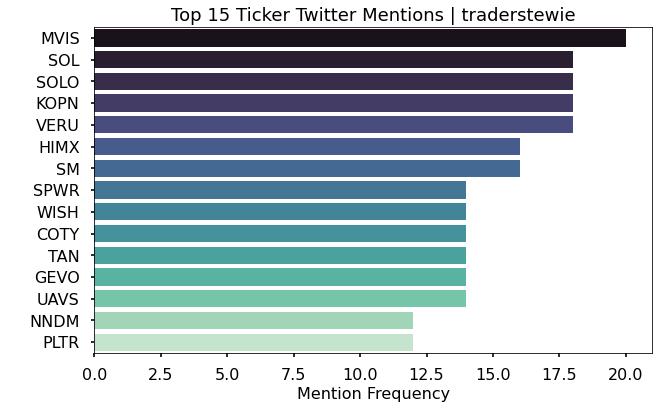

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(data=tickers,x='Mentions',y='Tickers',palette='mako')
plt.title('Top 15 Ticker Twitter Mentions | traderstewie', fontdict={'fontsize': 18});
plt.xlabel('Mention Frequency',fontdict={'fontsize': 16})
plt.ylabel(' ');
# fig.savefig('tickermentions.jpg',dpi=200,bbox_inches='tight')

In [11]:
tickerlist

['MVIS',
 'SOL',
 'SOLO',
 'KOPN',
 'VERU',
 'HIMX',
 'SM',
 'SPWR',
 'WISH',
 'COTY',
 'TAN',
 'GEVO',
 'UAVS',
 'NNDM',
 'PLTR']

# Future Work
While notebook number two will provide additional financial analysis it is important to note that a huge opportunity for Natural Language Processing is available here. In future work, NLP should be used to tweet sentiment analysis as well as a matching of datasets based on date to observe correlations between tweet mention and price fluctuation. 